# Tennis Ace
This project has the objective of creating a linear regression model that predicts the outcome of a tennis player based on their playing habits. 

## Data

The data comes from the [Association of Tennis Professionals (ATP)](https`://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) which contains information about the top 1500 ranked players over the span of 2009 to 2017. 

The statistics included are:

### Unique Data
- `Player`: name of the tennis player
- `Year`: year data was recorded

### Offensive Data
- `Aces`: number of serves by the player where the receiver does not touch the ball
- `DoubleFaults`: number of times player missed both first and second serve attempts
- `FirstServe`: number of first-serve attempts made
- `FirstServePointsWon`: number of first-serve attempt points won by the player
- `SecondServePointsWon`: number of second-serve attempt points won by the player
- `BreakPointsFaced`: number of times where the receiver could have won service game of the player
- `BreakPointsSaved`: number of the times the player was able to stop the receiver from winning service game when they had the chance
- `ServiceGamesPlayed`: total number of games where the player served
- `ServiceGamesWon`: total number of games where the player served and won
- `TotalServicePointsWon`: number of points in games where the player served that they won

### Defensive Data
- `FirstServeReturnPointsWon`: number of opponents first-serve points the player was able to win
- `SecondServeReturnPointsWon`: number of opponents second-serve points the player was able to win
- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
- `BreakPointsConverted`: number of the time the player was able to win their opponent’s service game when they had the chance
- `ReturnGamesPlayed`: total number of games where the player’s opponent served
- `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
- `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
- `TotalPointsWon`: number of points won by the player

### Outcomes Data
- `Wins`: number of matches won in a year
- `Losses`: number of matches lost in a year
- `Winnings`: total winnings in USD($) in a year
- `Ranking`: ranking at the end of year


## Import Python Modules
First, import the preliminary modules that will be used in this project`:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading Data
First, lets visualize the data of `tennis_stats.csv` into `tennis_data`.

In [10]:
tennis_data = pd.read_csv('tennis_stats.csv')
tennis_data.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

## Exploratory Data Analysis
First, lets perform a general data analysis to see if there is any relationship between features and outcomes. 

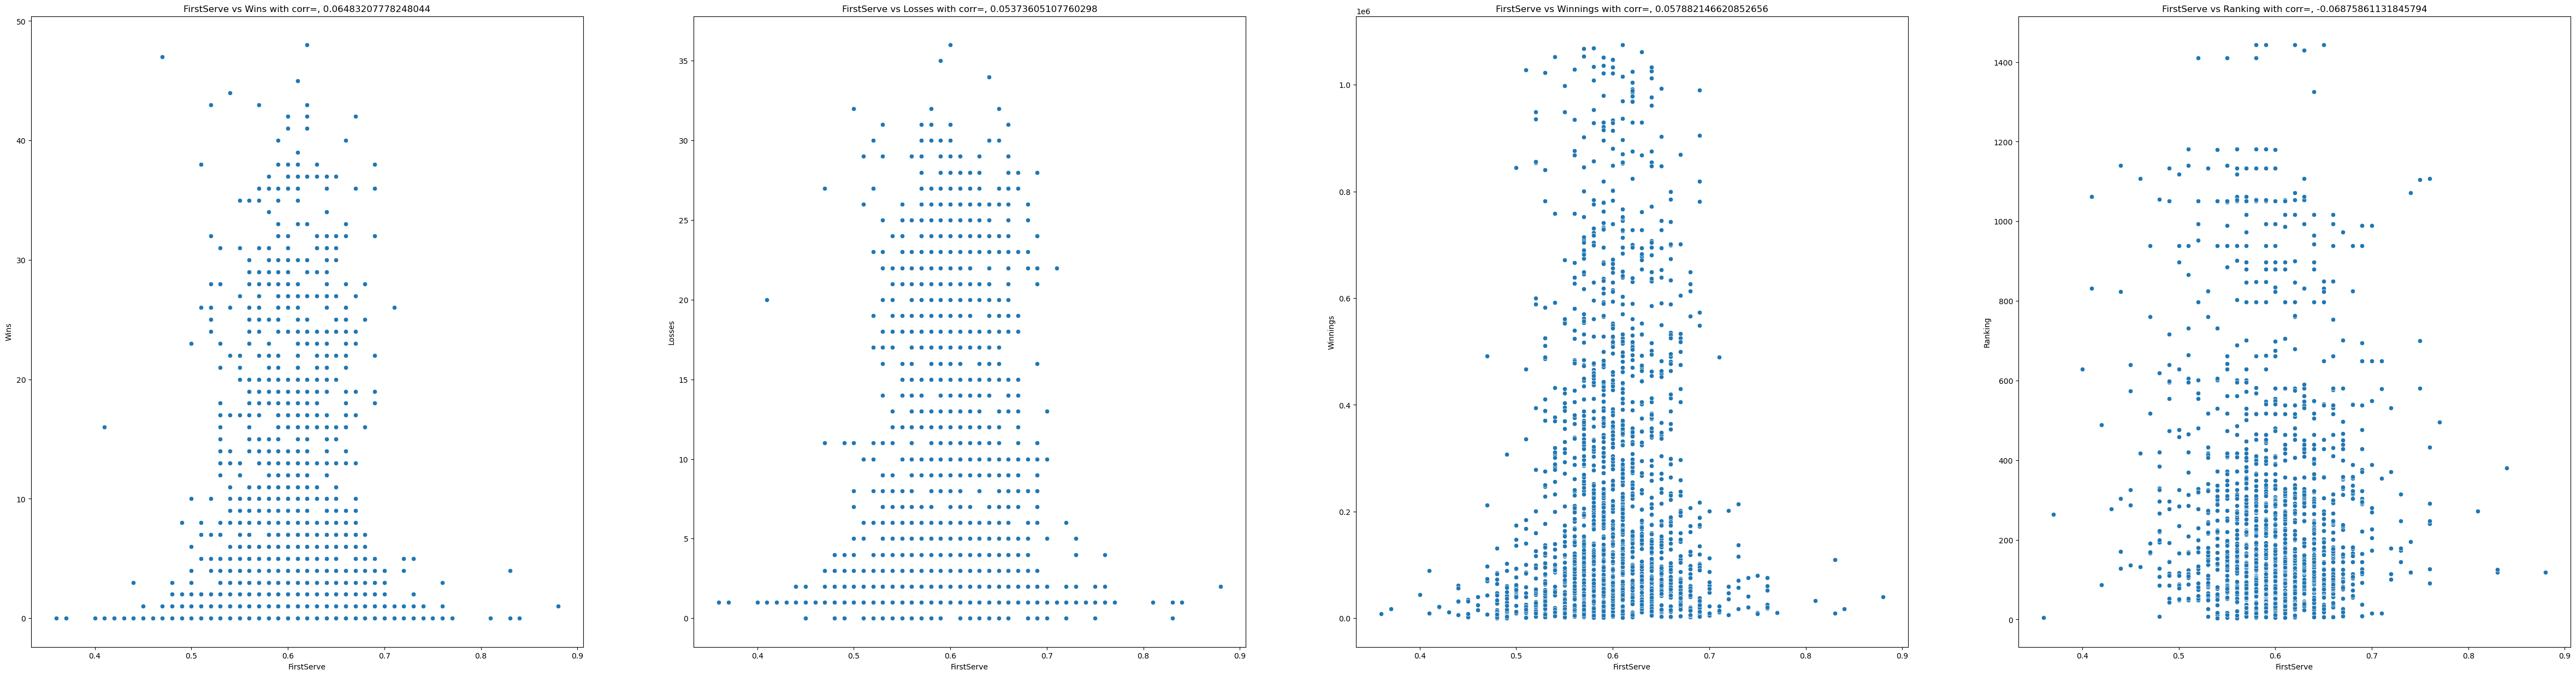

<Figure size 640x480 with 0 Axes>

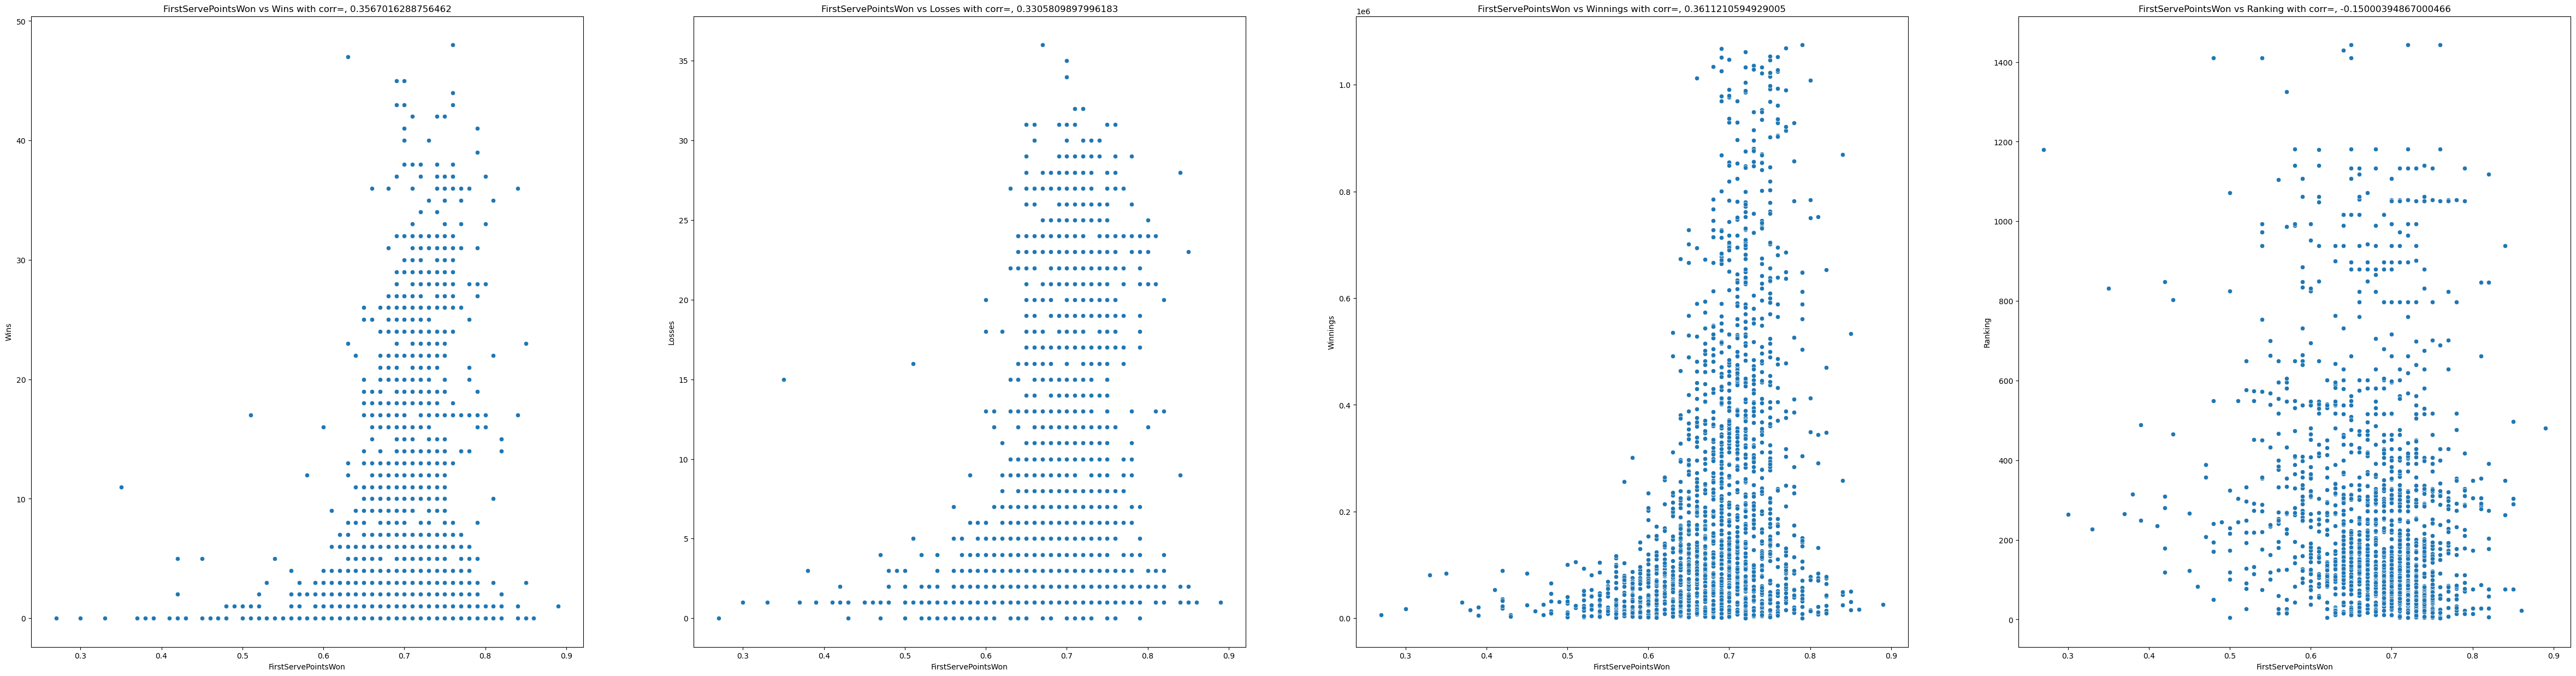

<Figure size 640x480 with 0 Axes>

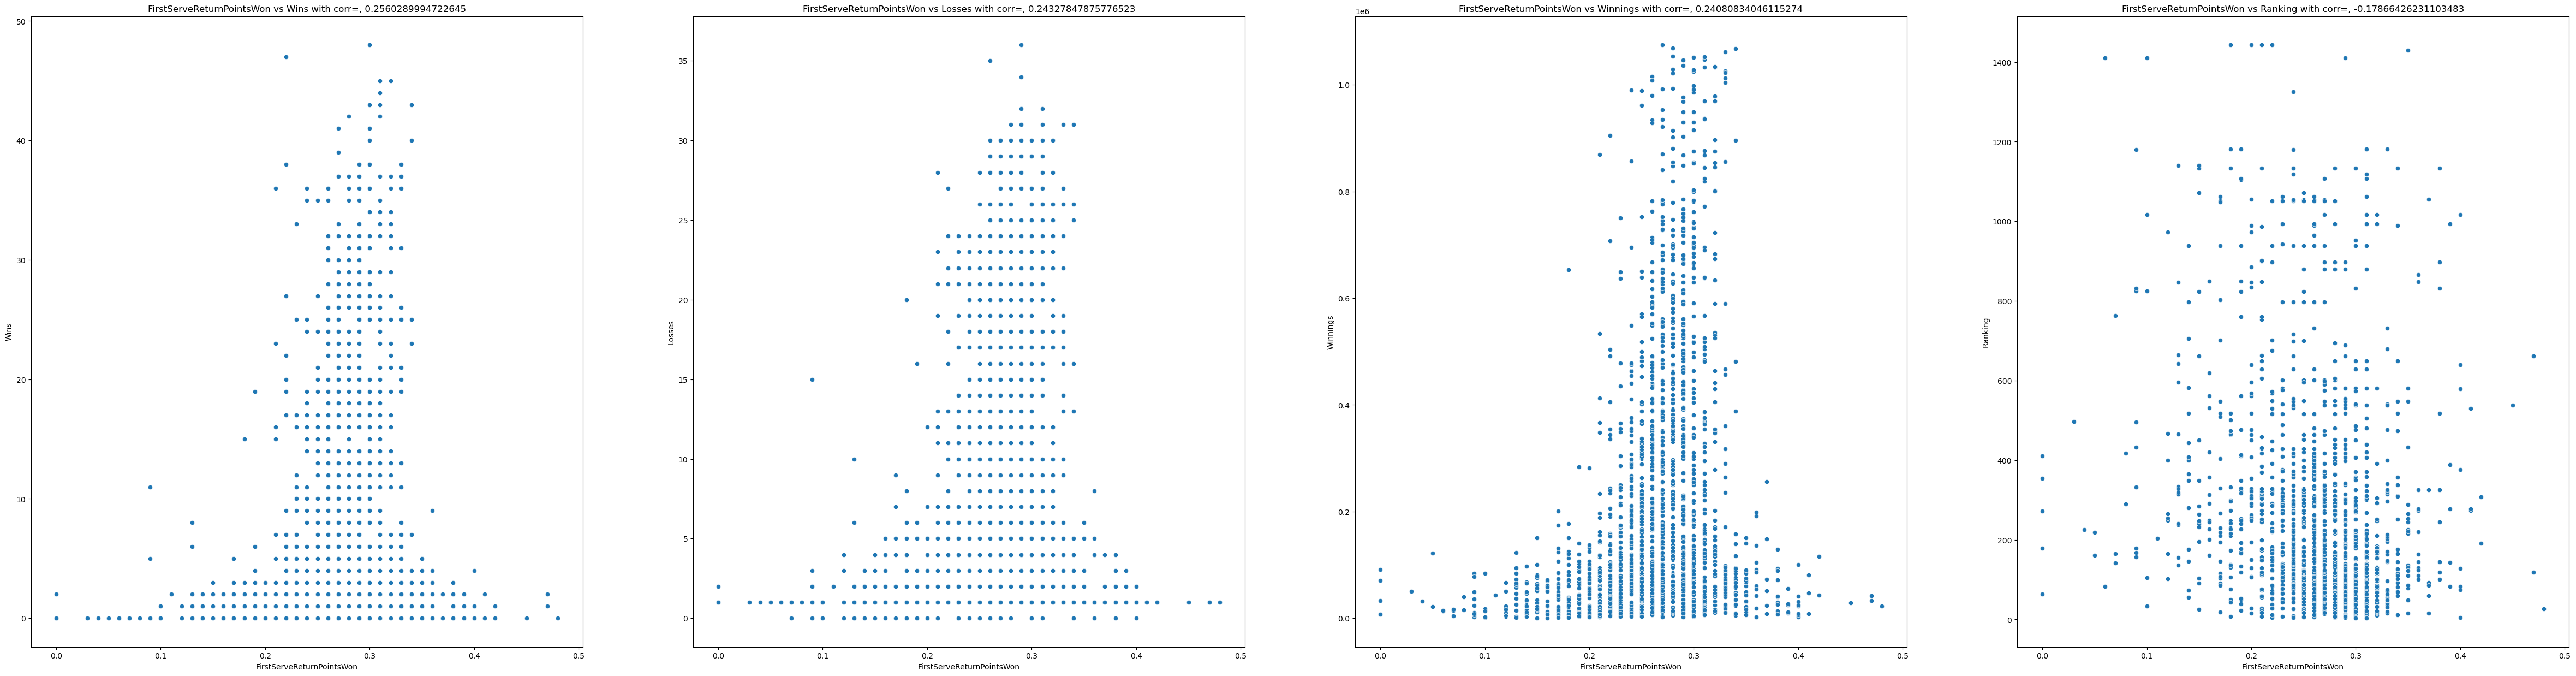

<Figure size 640x480 with 0 Axes>

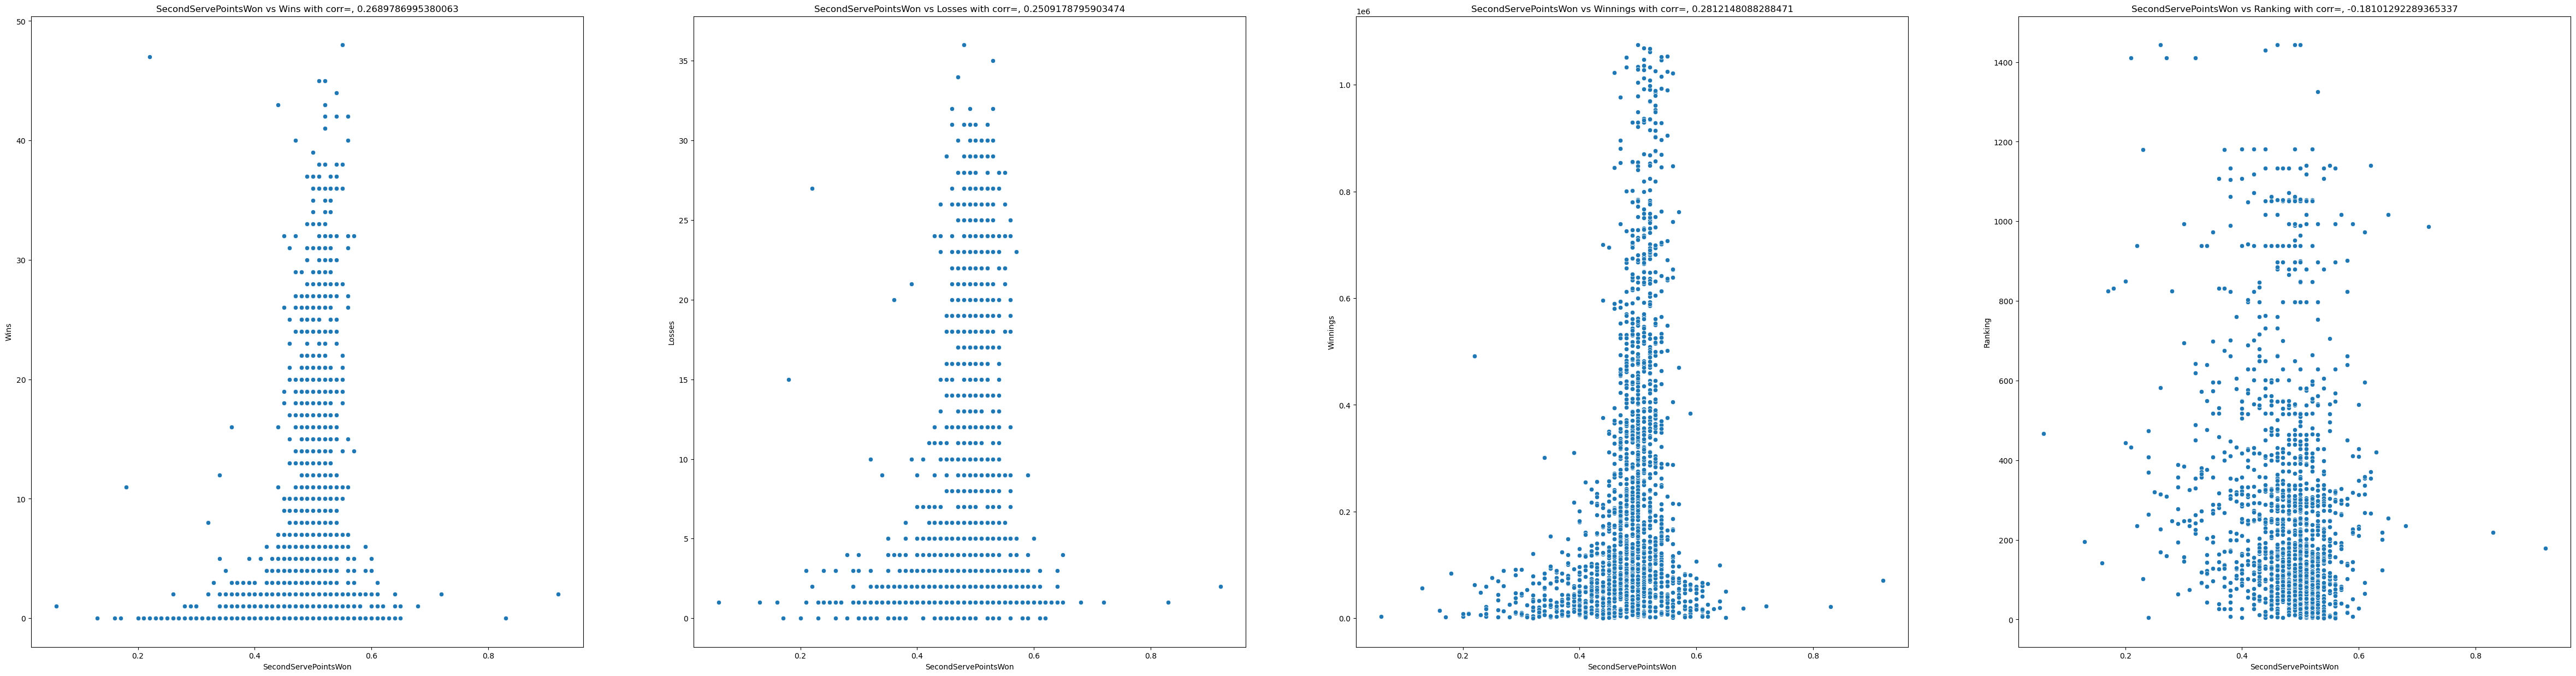

<Figure size 640x480 with 0 Axes>

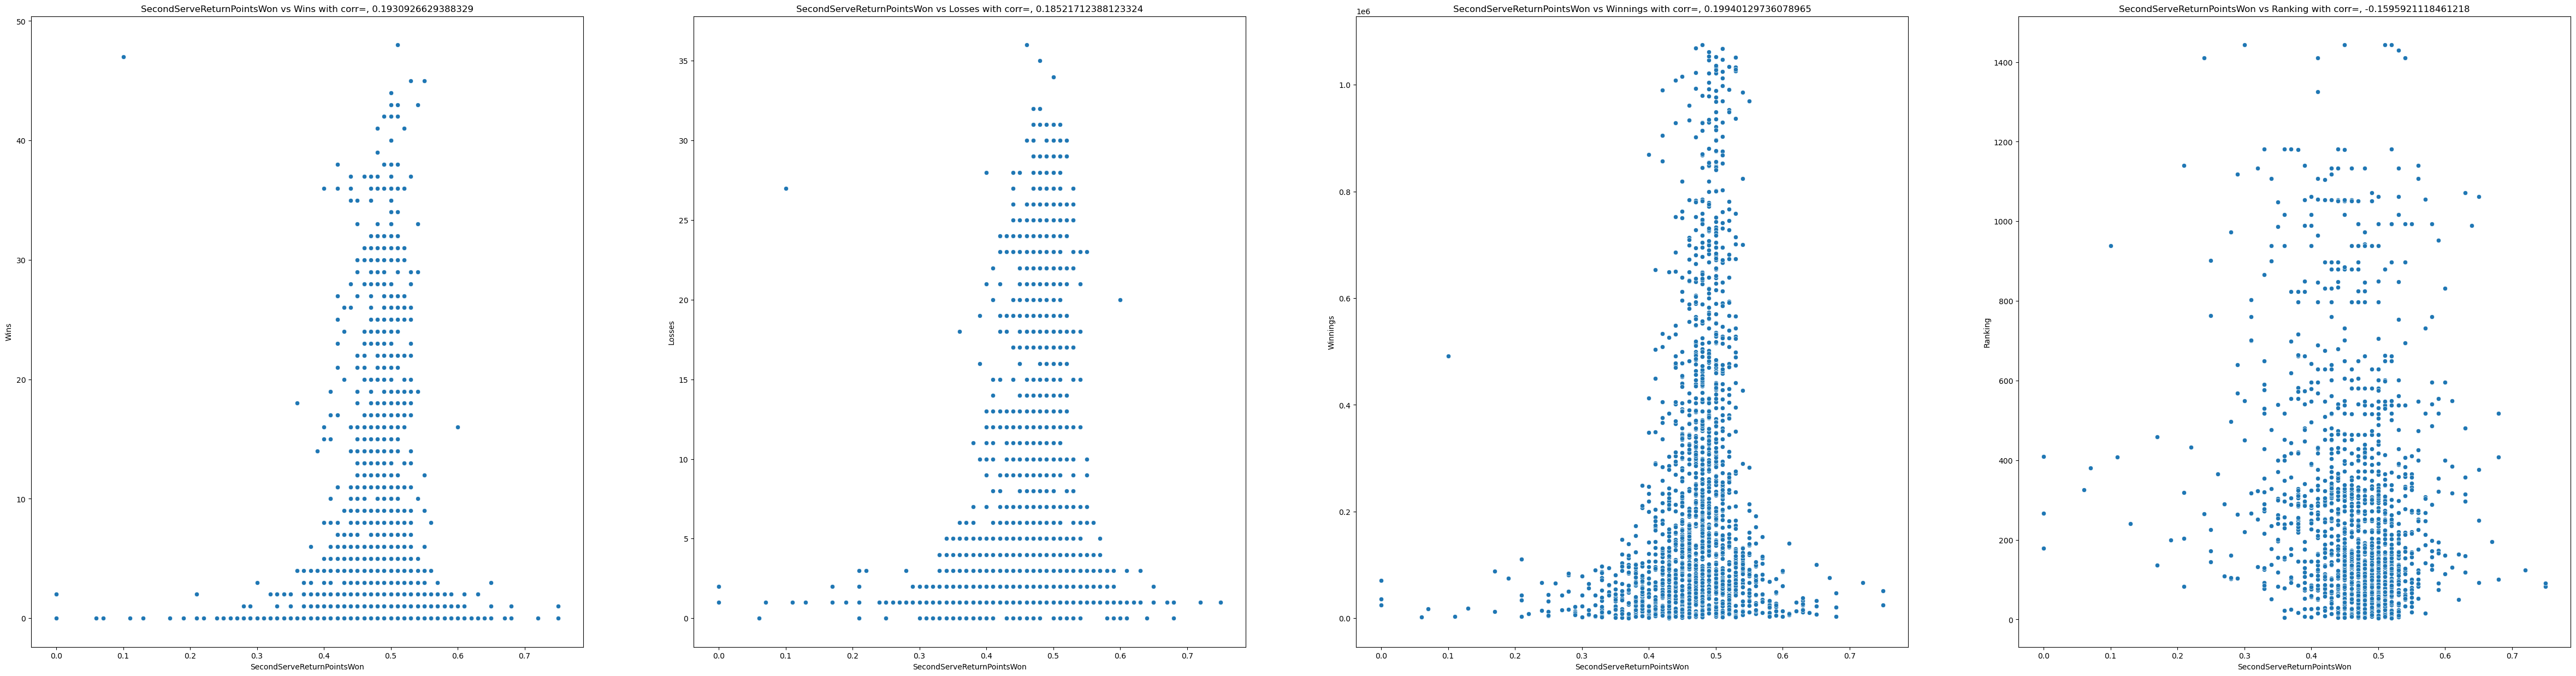

<Figure size 640x480 with 0 Axes>

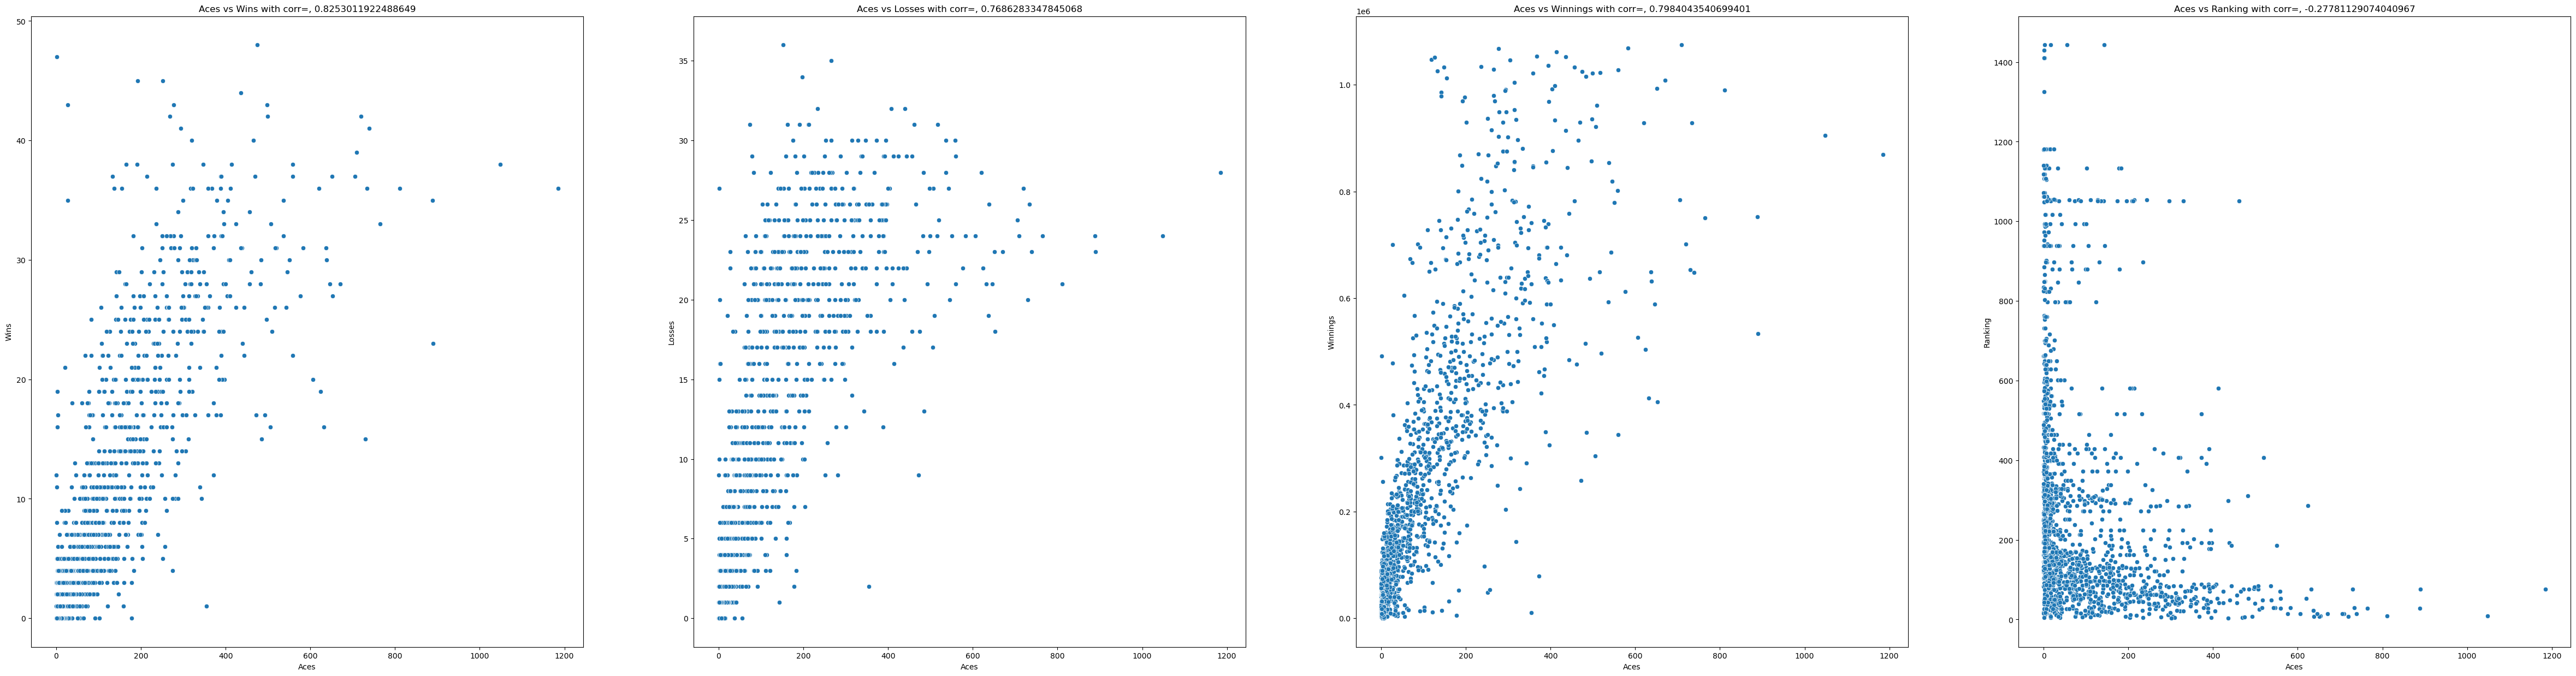

<Figure size 640x480 with 0 Axes>

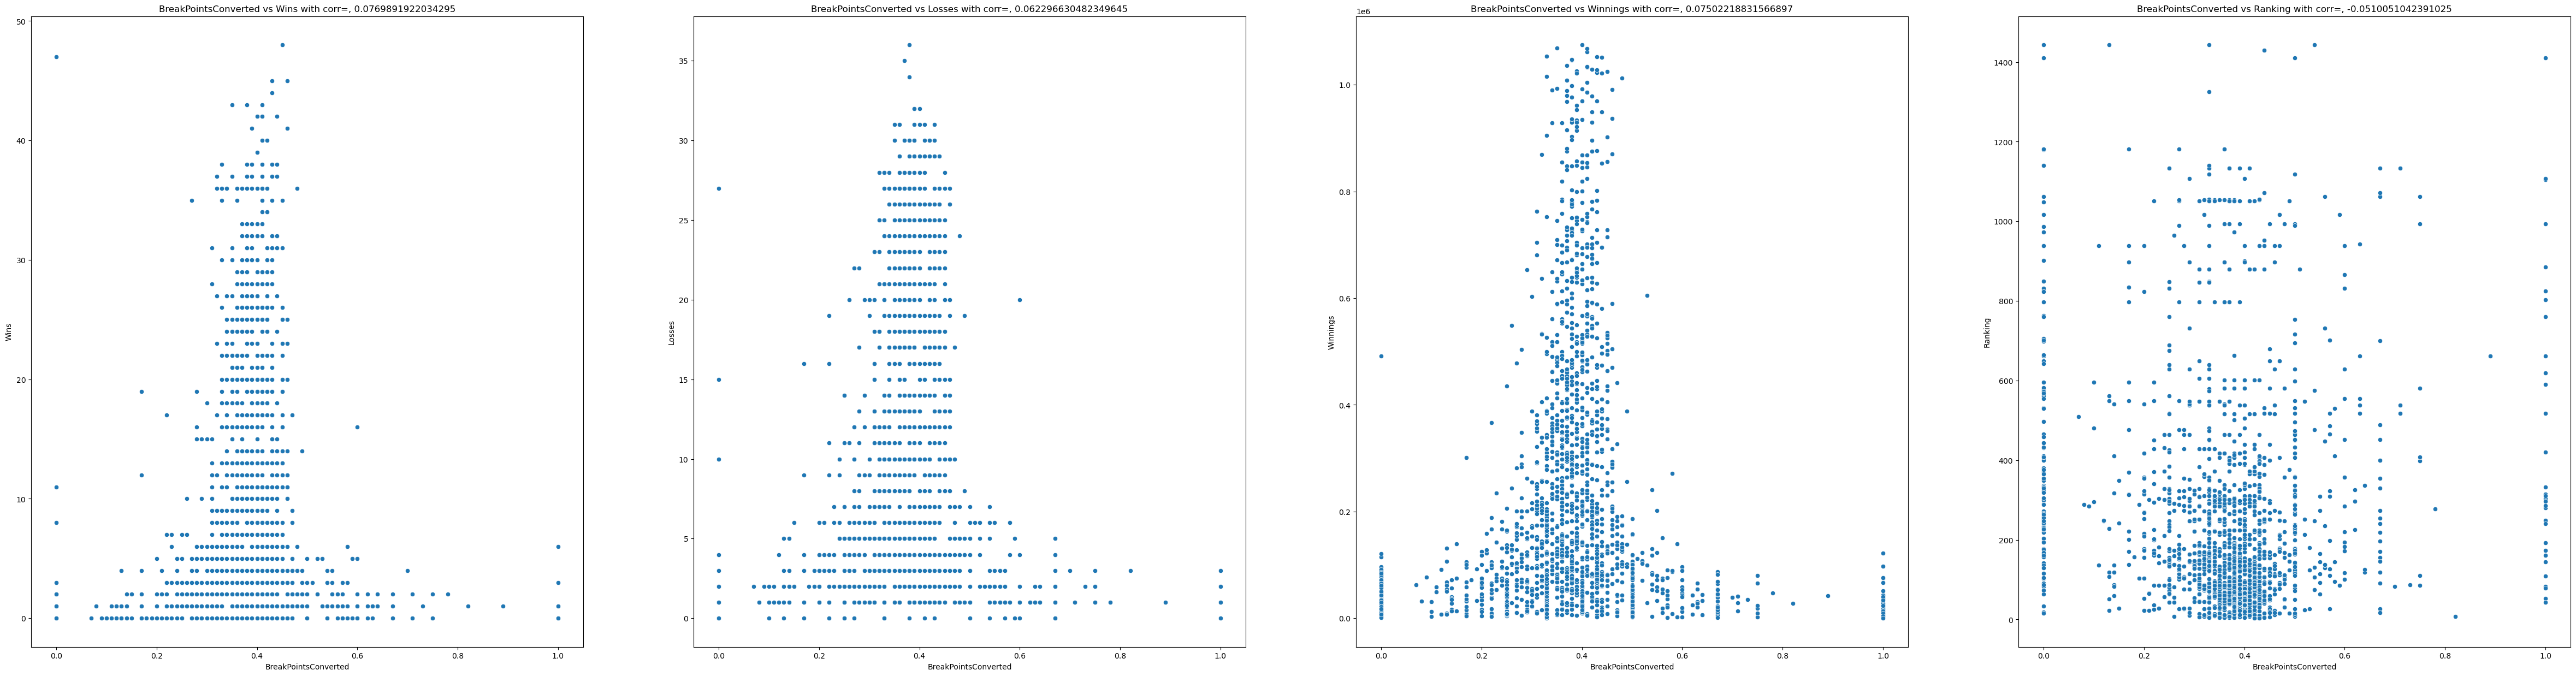

<Figure size 640x480 with 0 Axes>

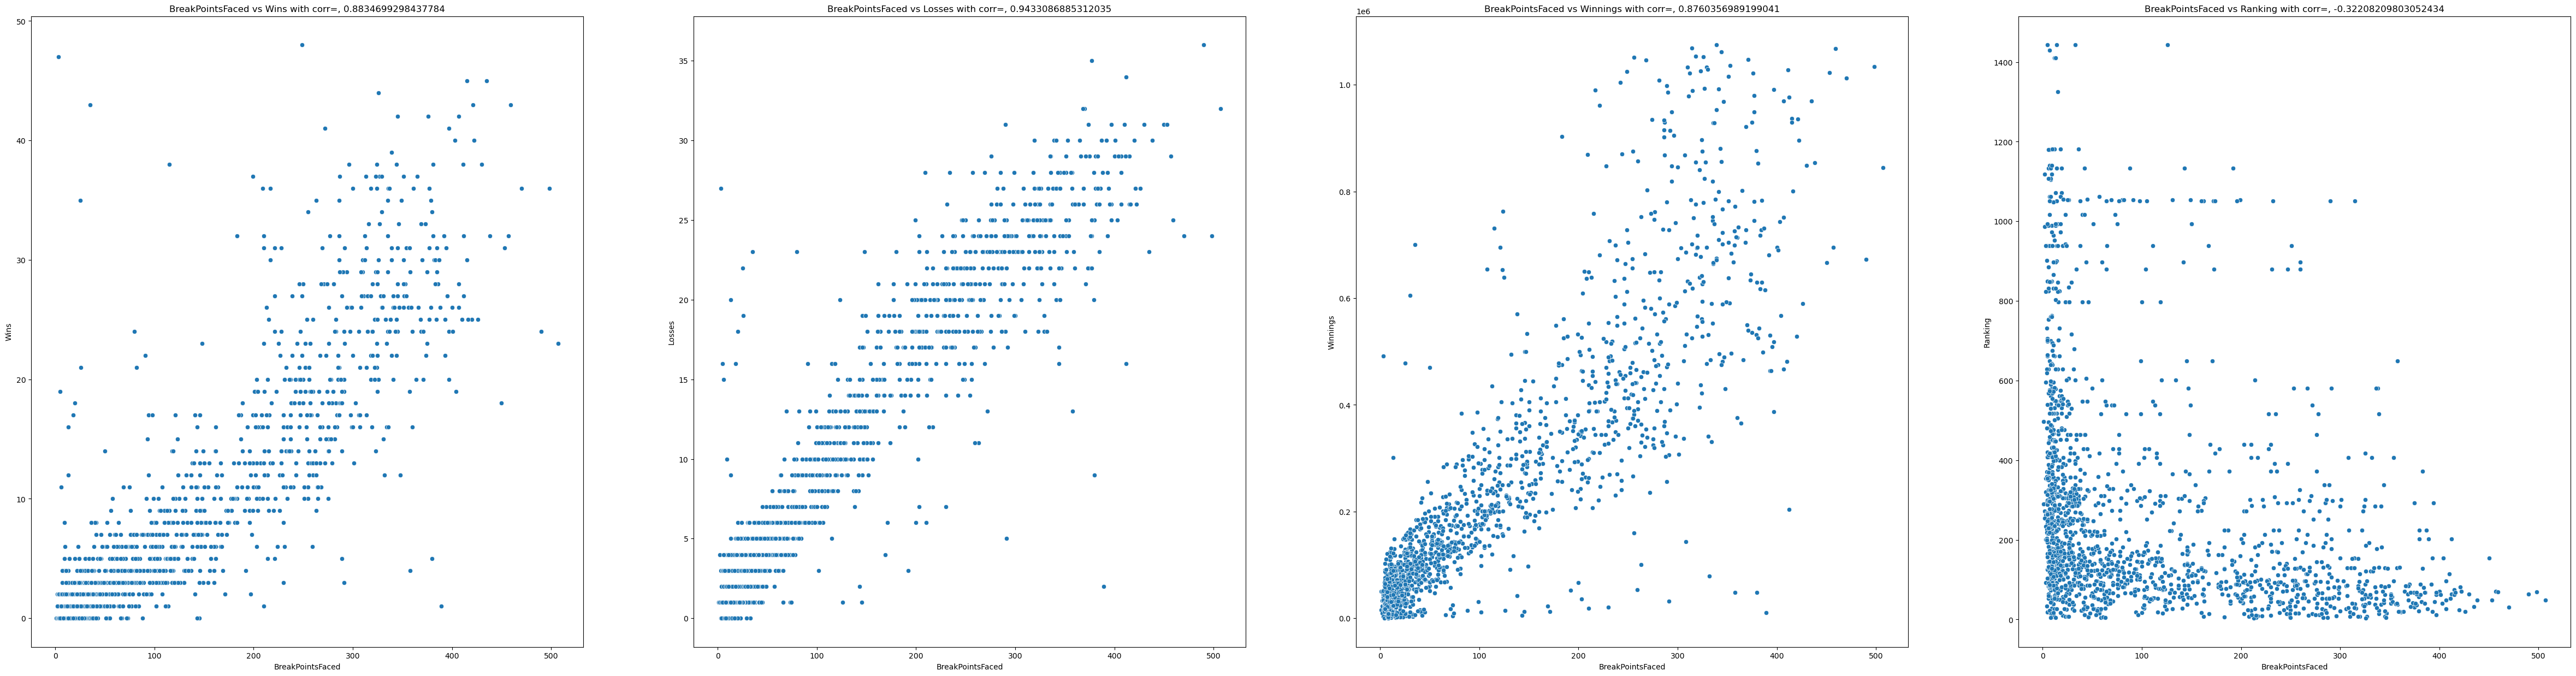

<Figure size 640x480 with 0 Axes>

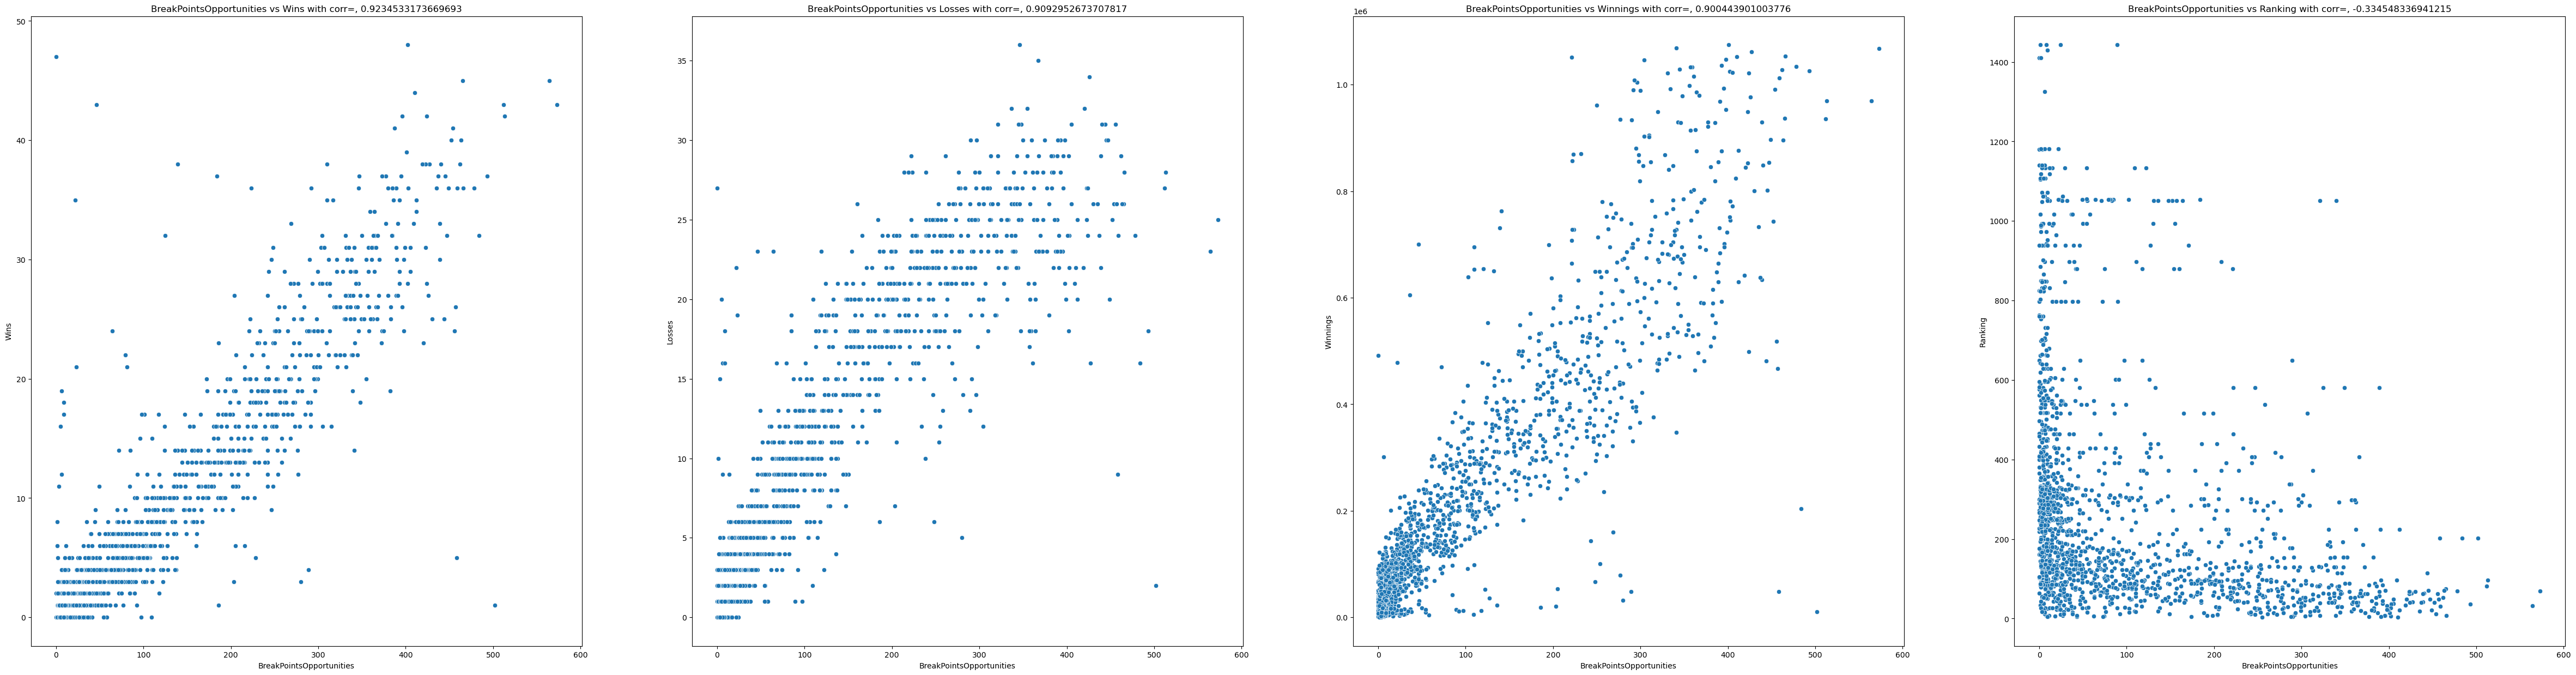

<Figure size 640x480 with 0 Axes>

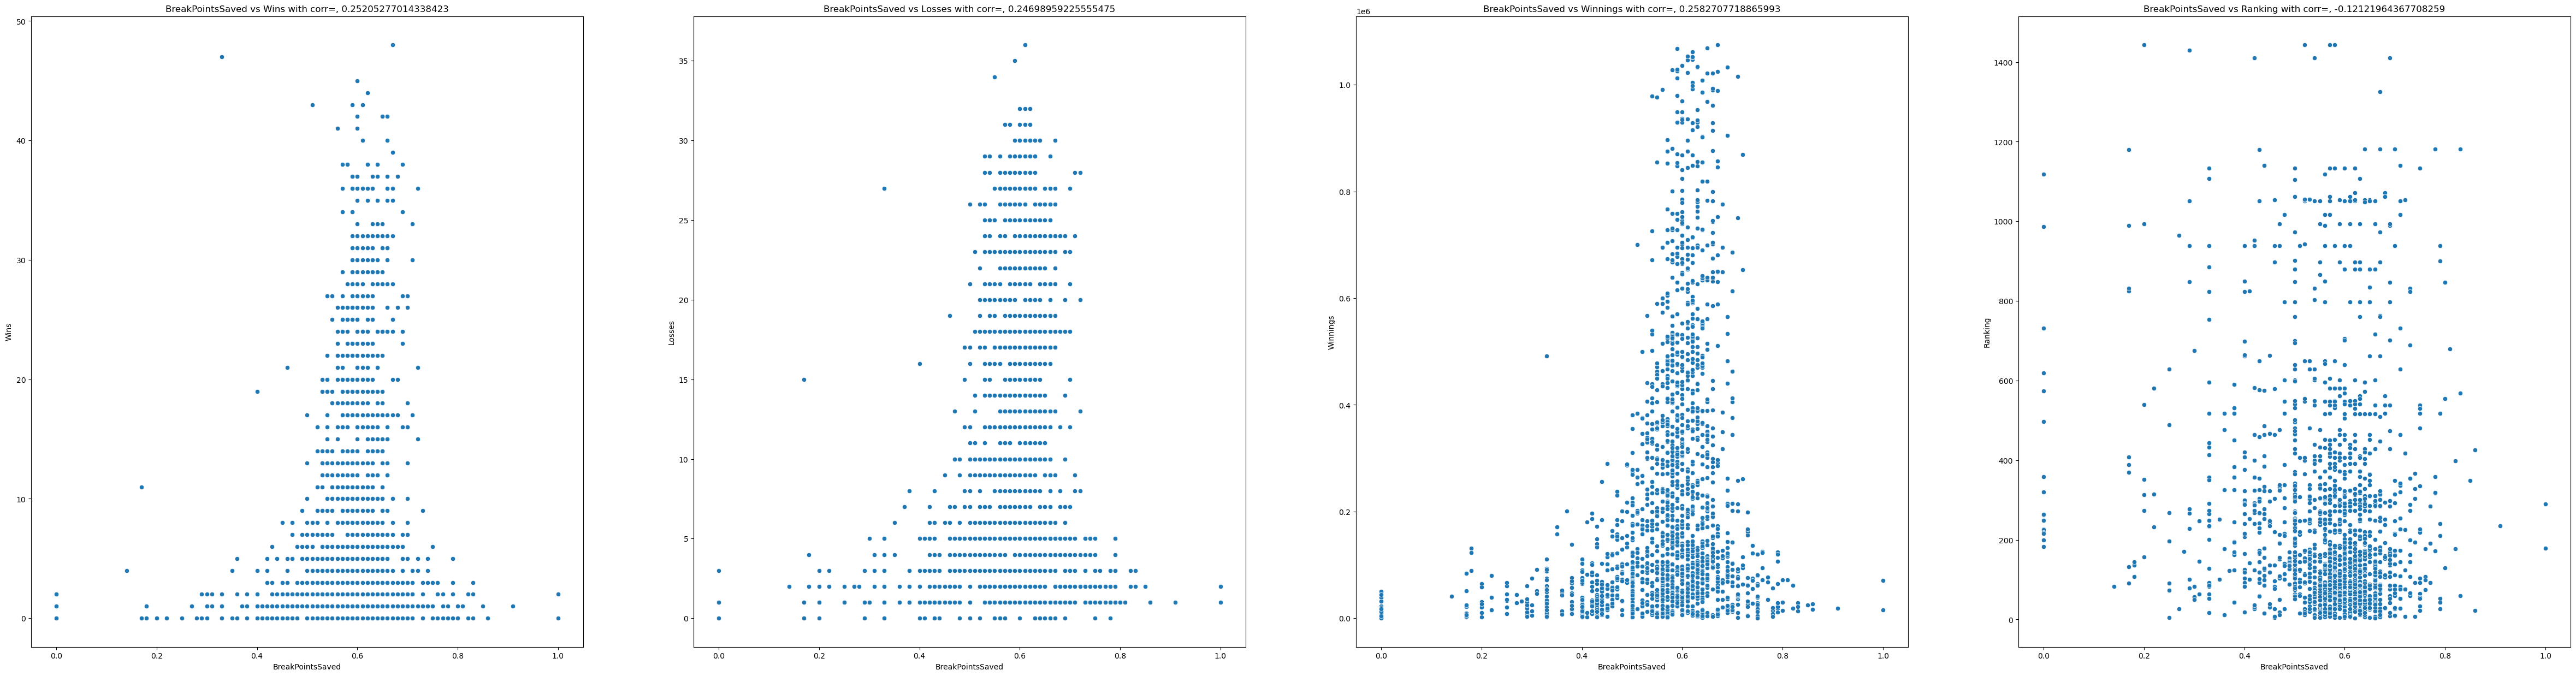

<Figure size 640x480 with 0 Axes>

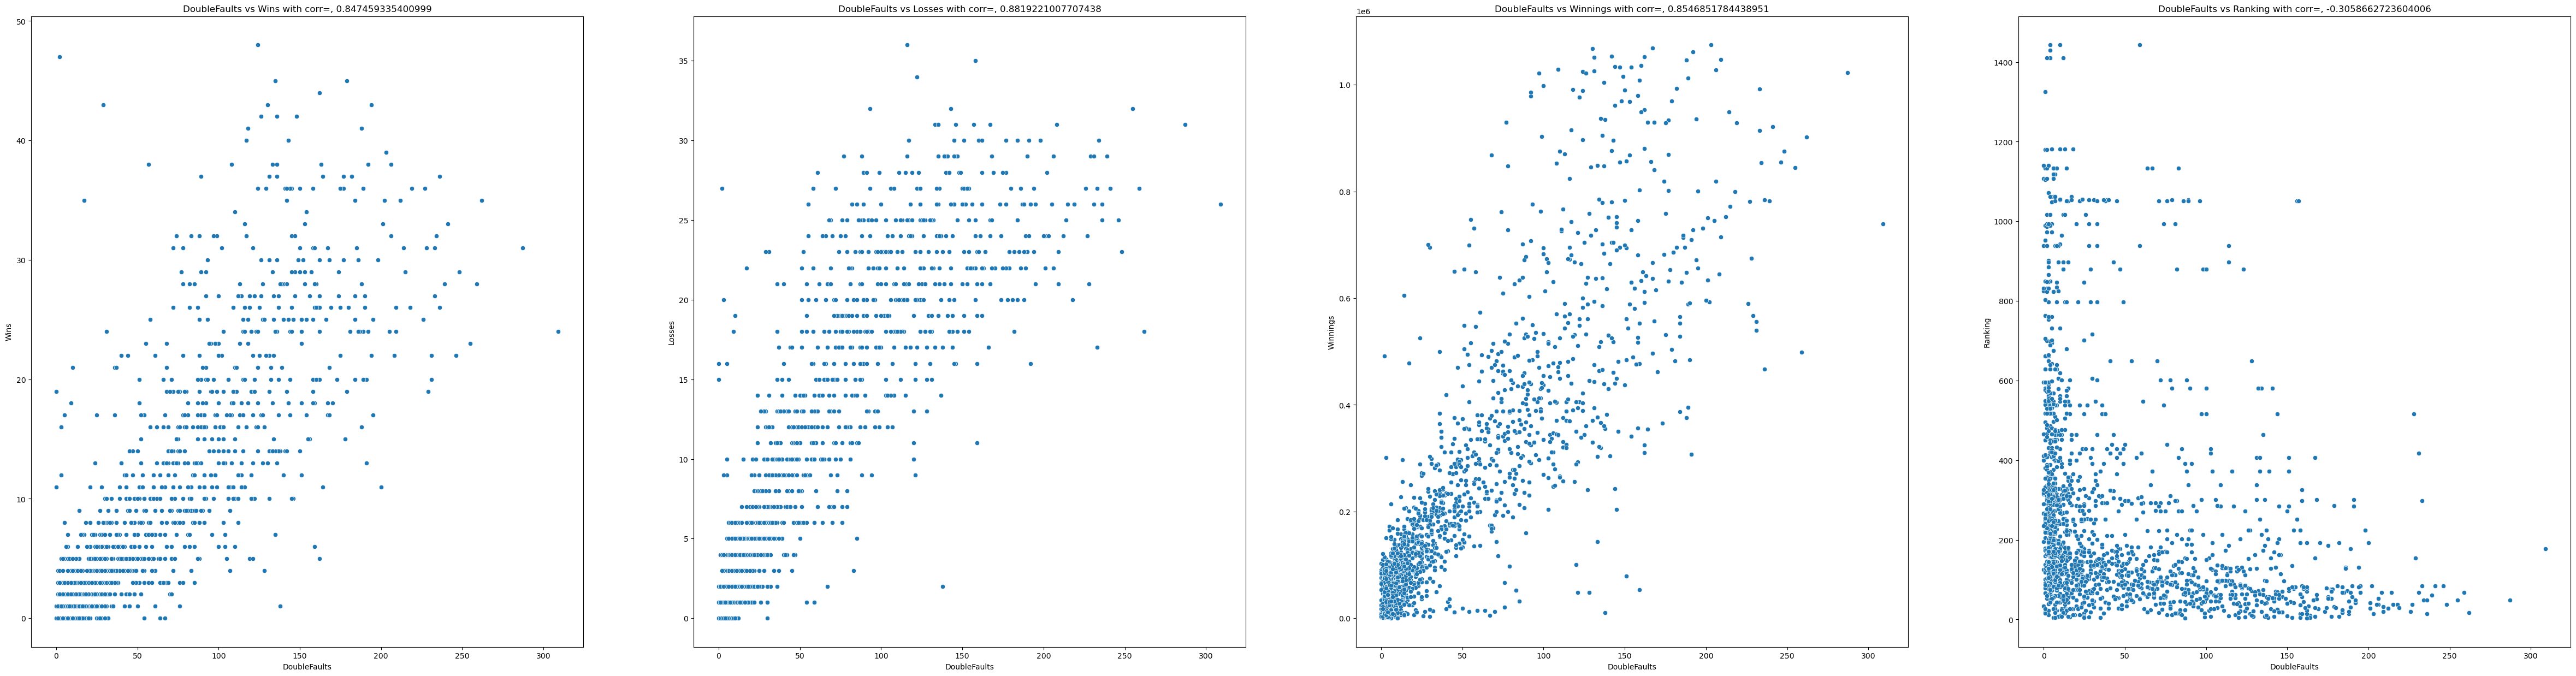

<Figure size 640x480 with 0 Axes>

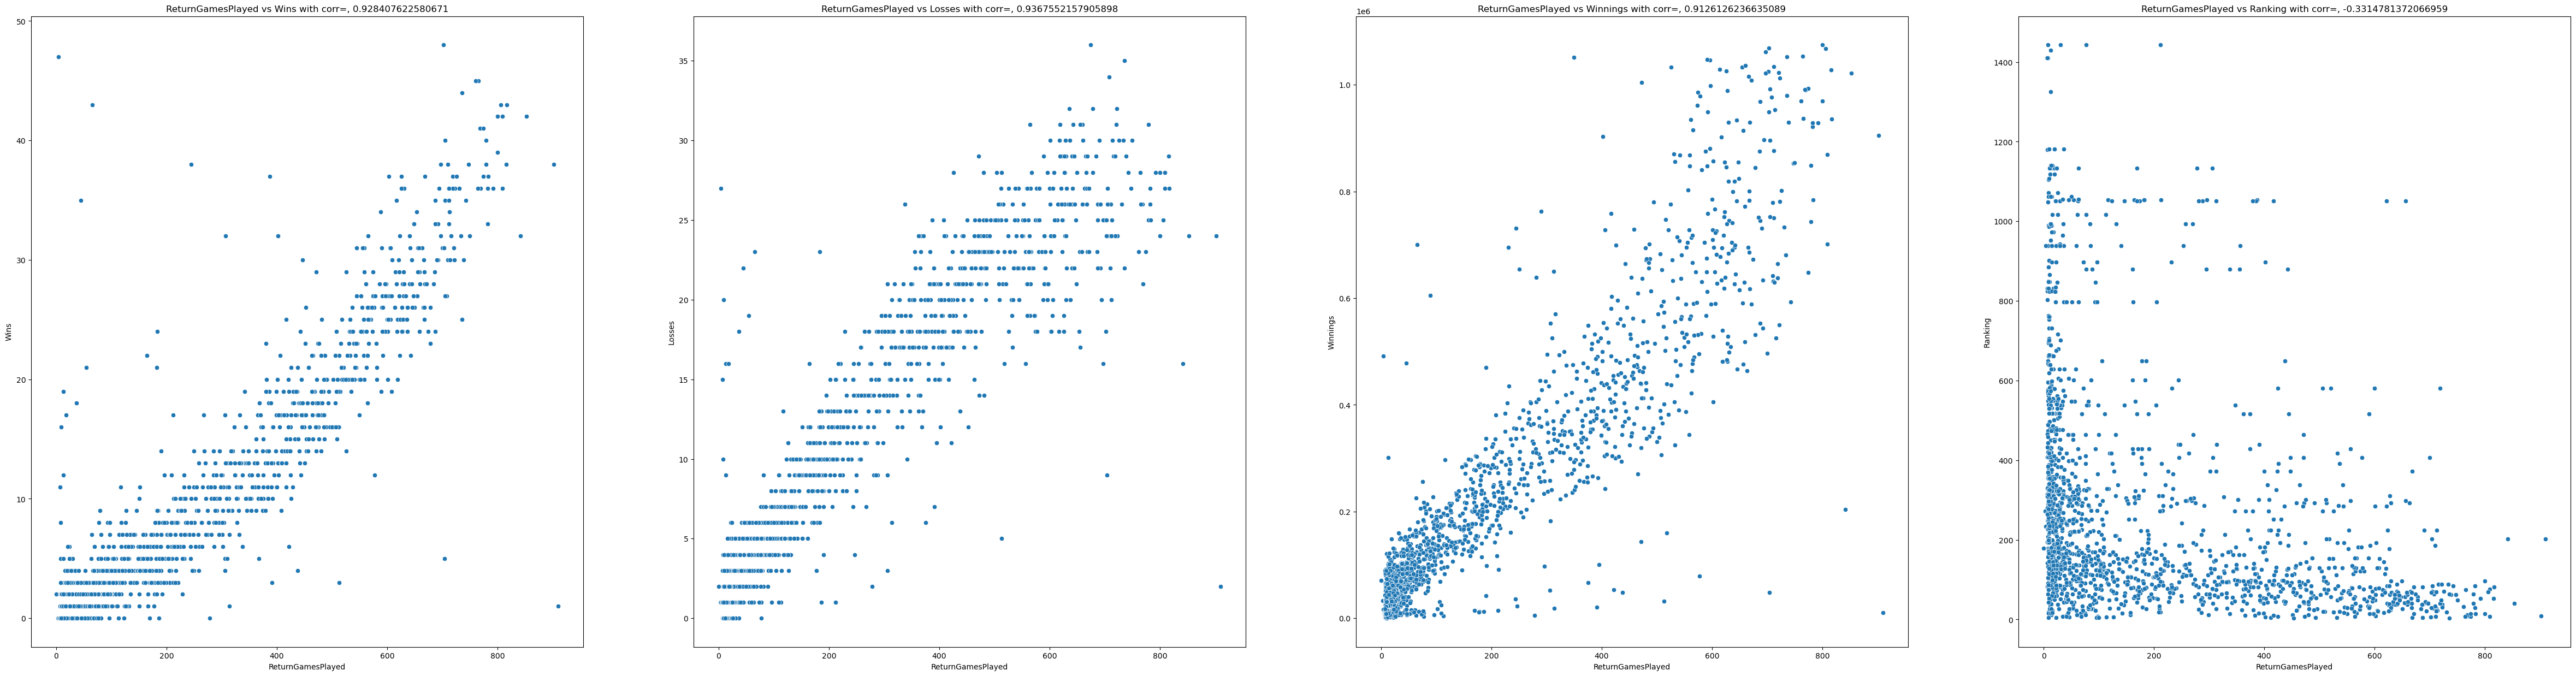

<Figure size 640x480 with 0 Axes>

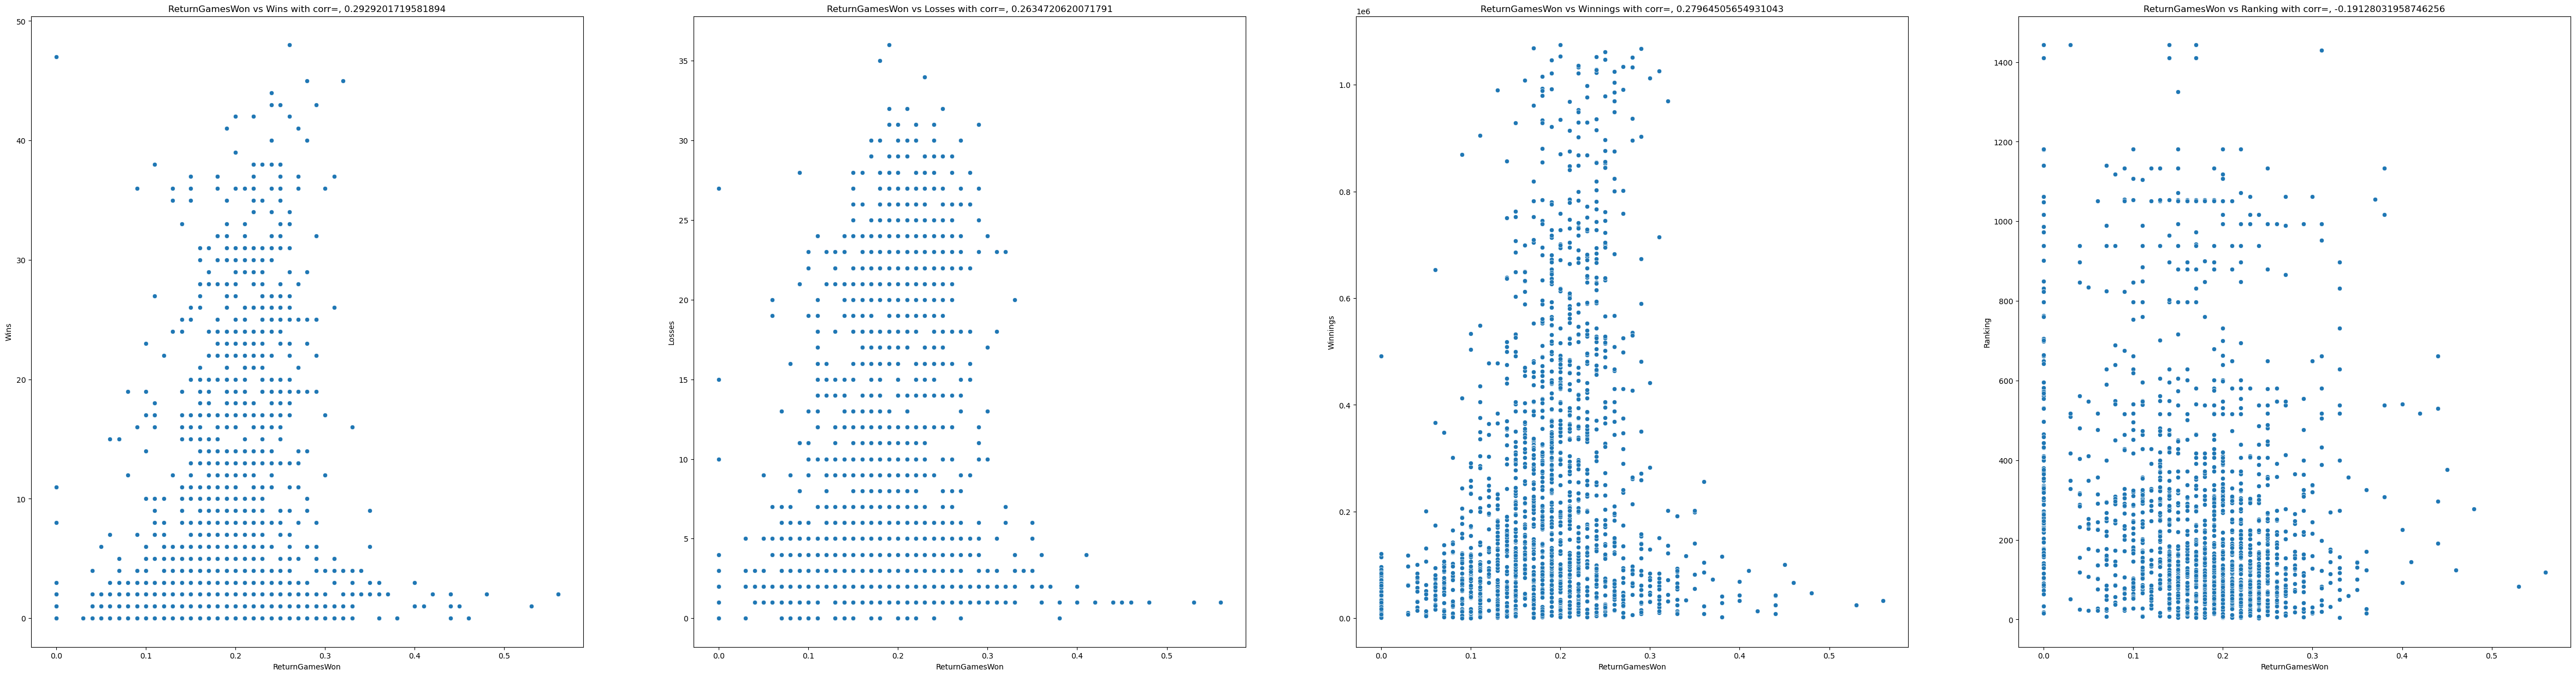

<Figure size 640x480 with 0 Axes>

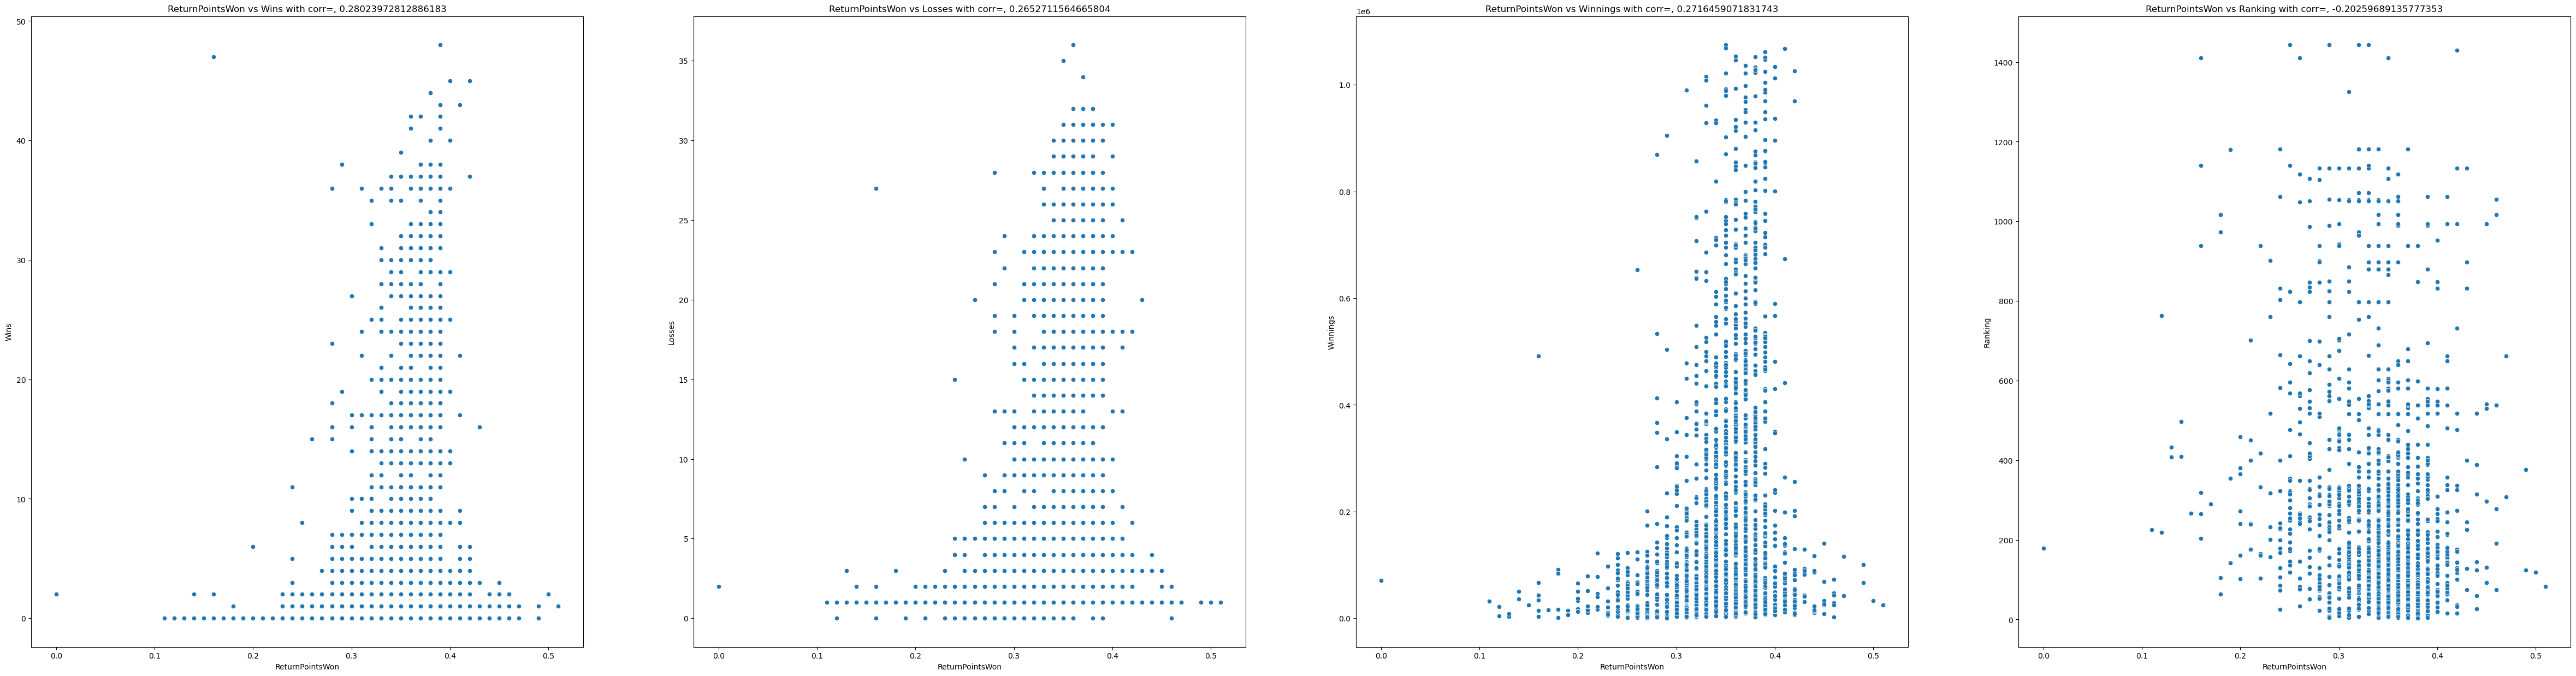

<Figure size 640x480 with 0 Axes>

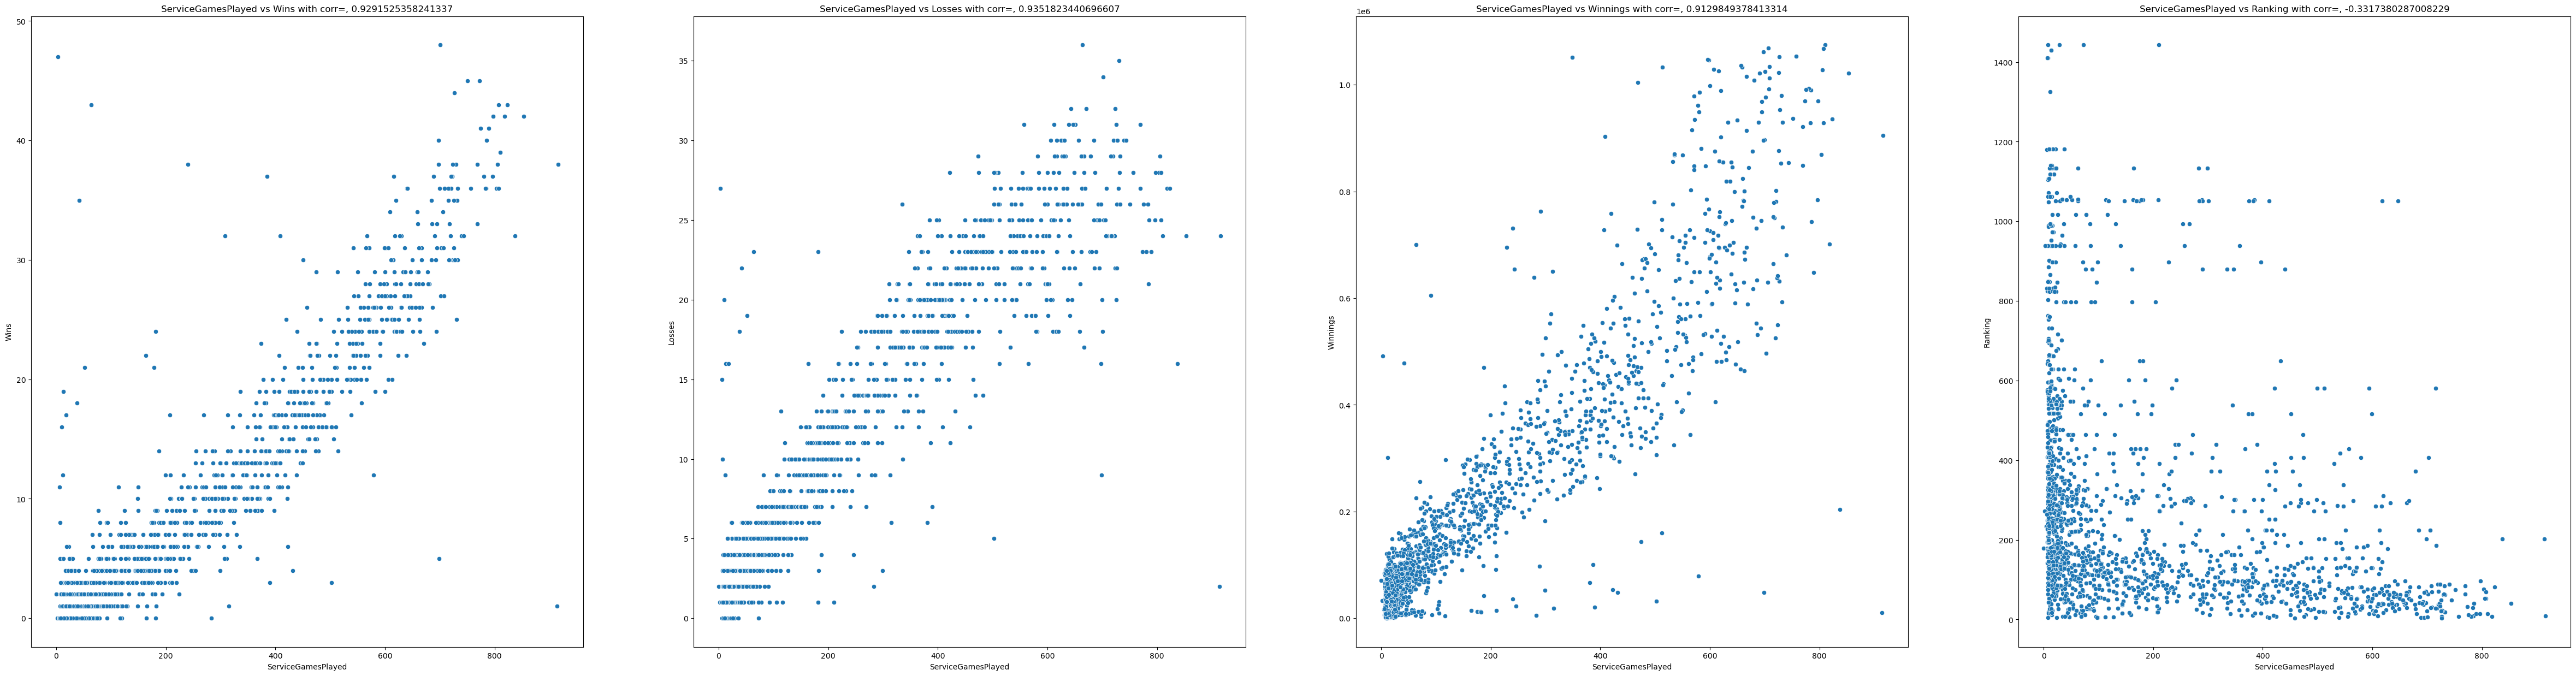

<Figure size 640x480 with 0 Axes>

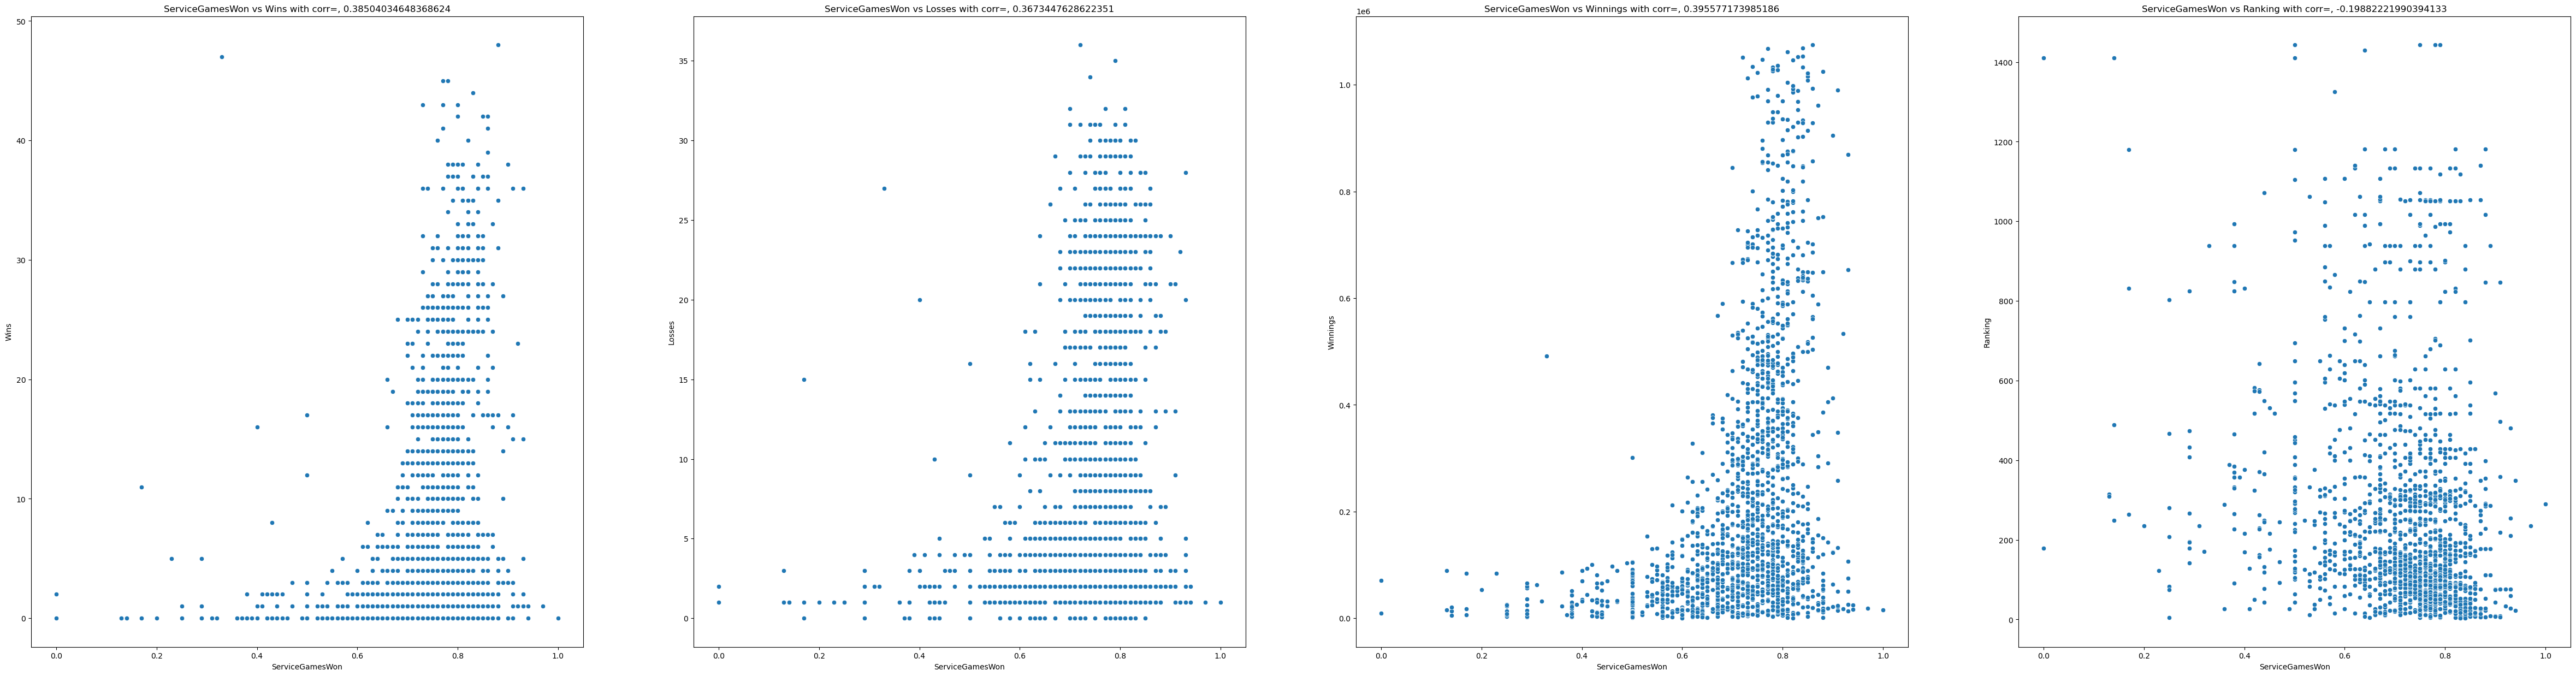

<Figure size 640x480 with 0 Axes>

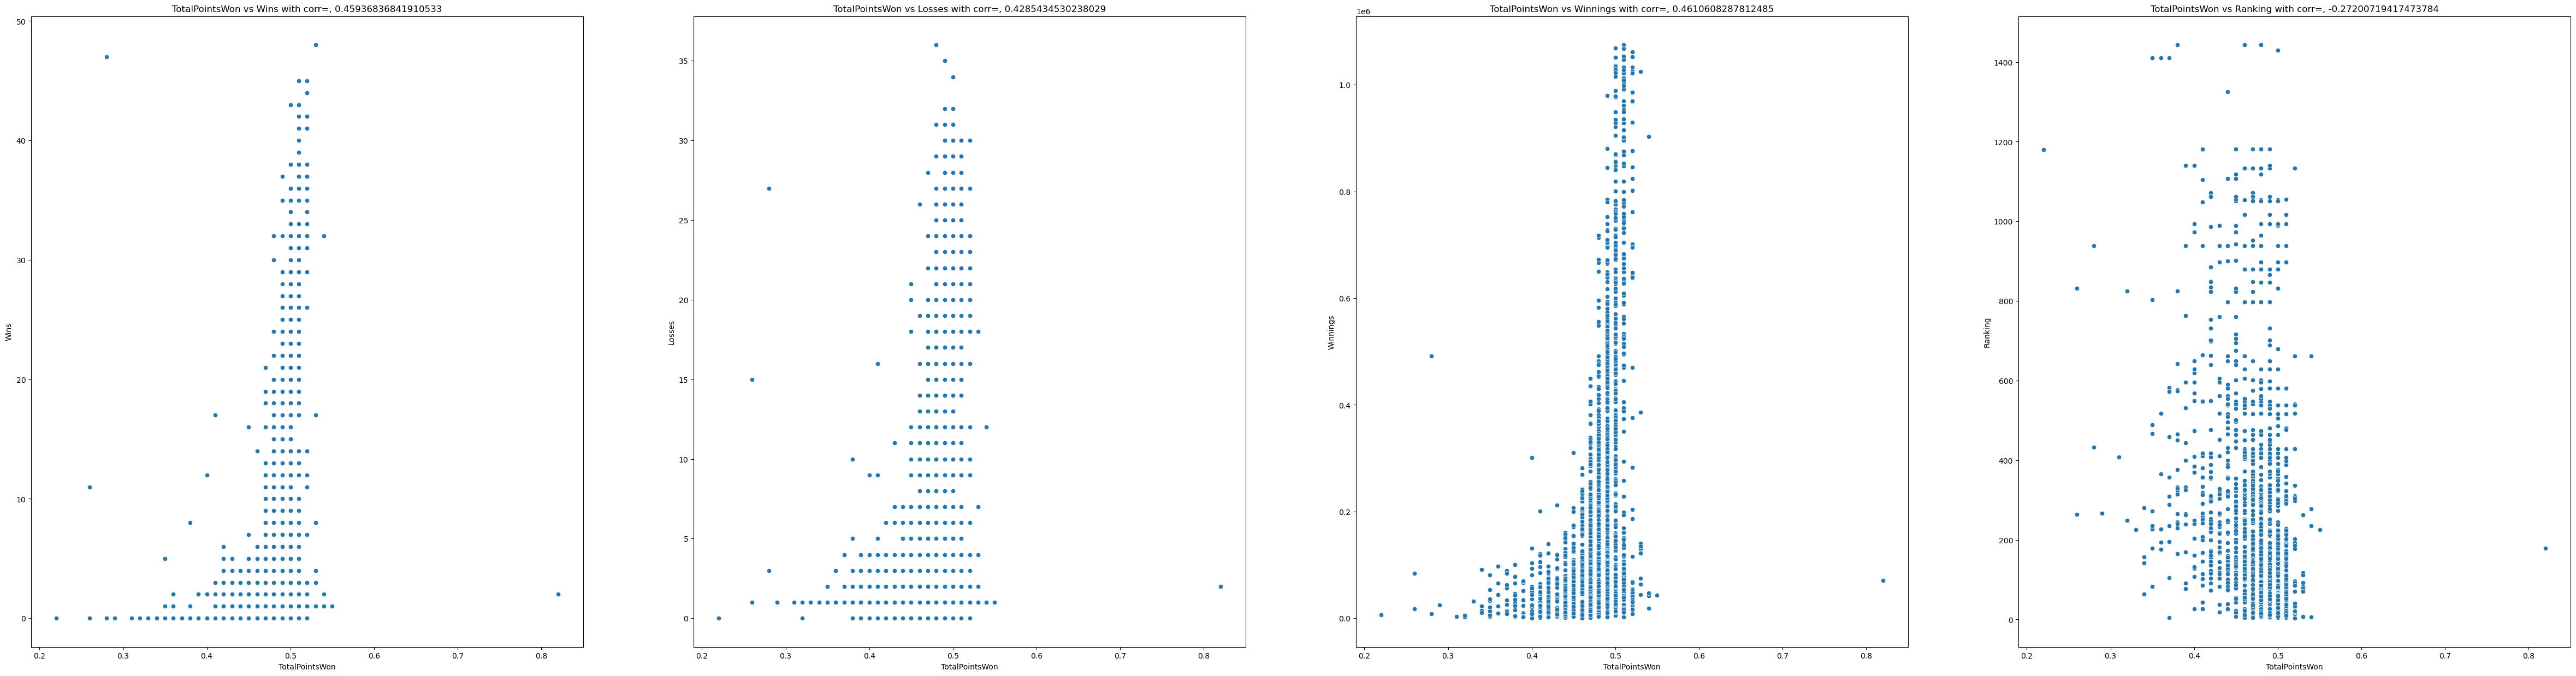

<Figure size 640x480 with 0 Axes>

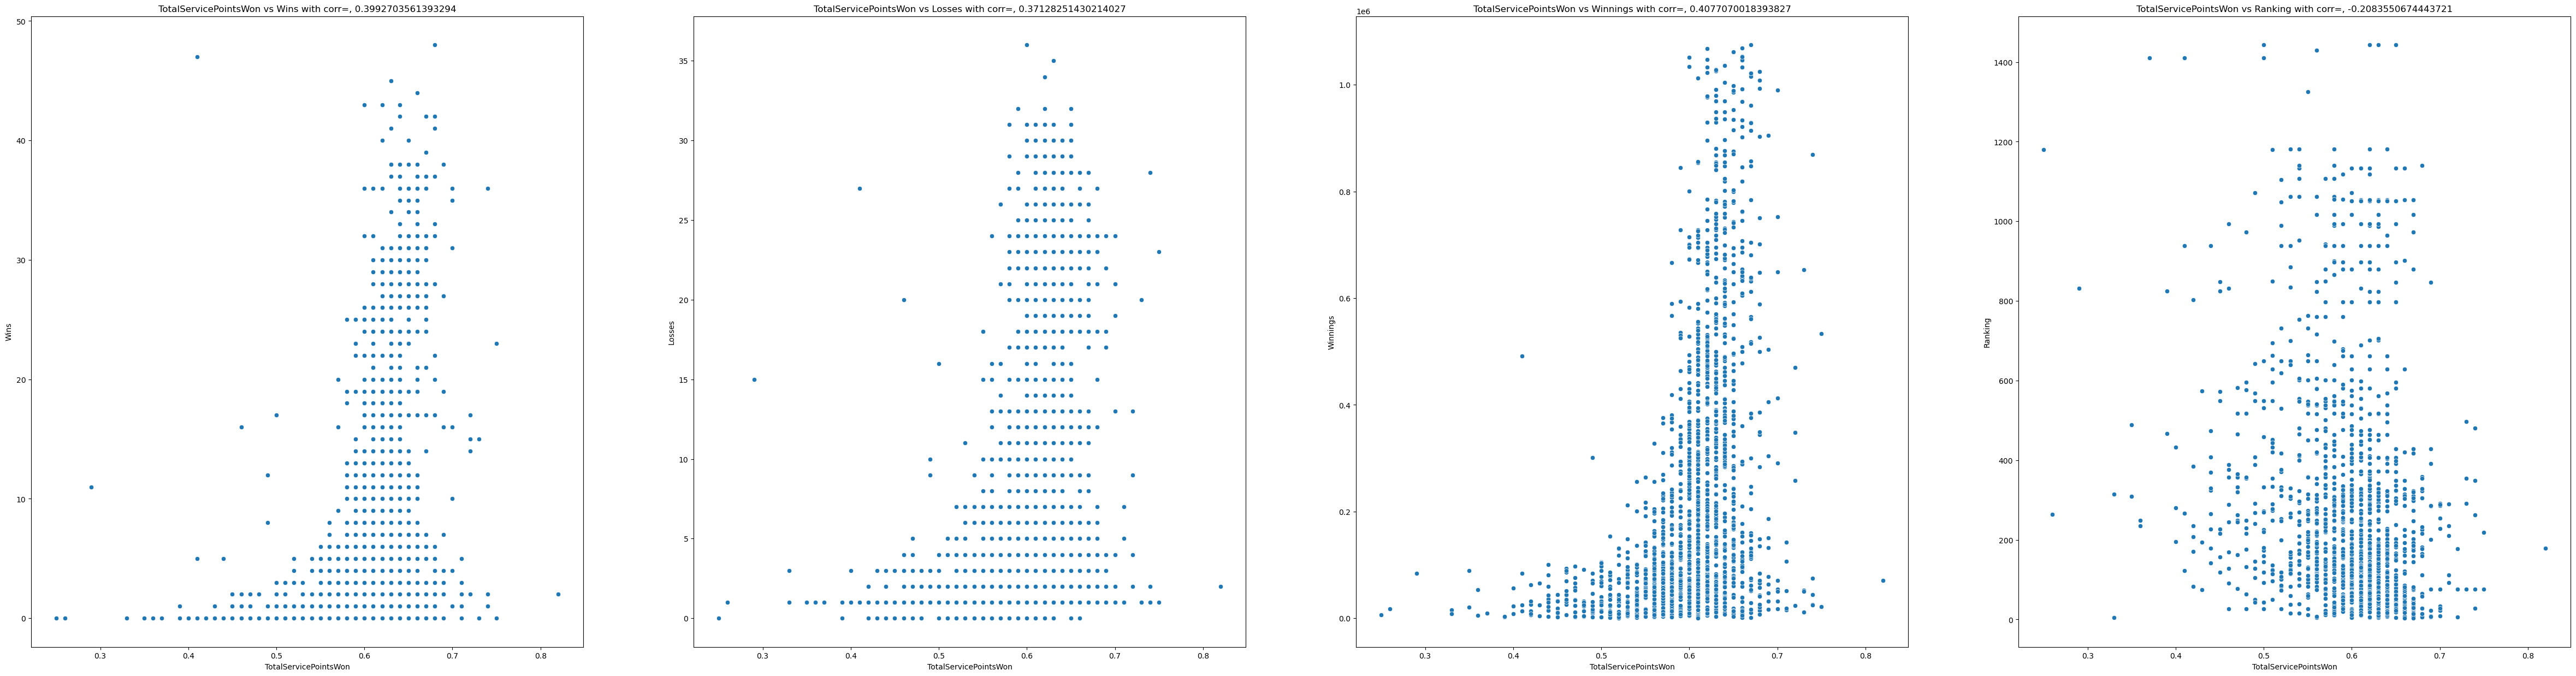

<Figure size 640x480 with 0 Axes>

In [33]:
from scipy.stats import pearsonr #library to find the correlation between variables

features_data = ['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon']
outcomes_data = ['Wins', 'Losses', 'Winnings','Ranking']
pearson_results = [] # Array that will contain the pearson correlation results

for feature in features_data:
    plt.figure(figsize=(60, 15)) # Each figure will contain the feature vs outcomes_data
    for index_outcome, outcome in enumerate(outcomes_data):
        plt.subplot(1, 4, index_outcome + 1)
        sns.scatterplot(data=tennis_data, x=feature, y=outcome)
        corr, _ = pearsonr(tennis_data[feature], tennis_data[outcome])
            
        plt.xlabel(feature)
        plt.ylabel(outcome)
        plt.title(f'{feature} vs {outcome} with corr=, {corr}')
        if corr >= 0.7 or corr <= -0.7:
            pearson_results.append((corr, f'{feature} vs {outcome} with corr=, {corr}')) # Save if there are any strong correlation
    plt.show()
    plt.clf()

From the previous graphs and the correlation results, we could see that the variables that show strong correlation (being greater than 0.7 or less than -0.7) in descending order are the next ones:

In [38]:
sorted(pearson_results, key = lambda x : x[0],reverse=True)

[(0.9433086885312035,
  'BreakPointsFaced vs Losses with corr=, 0.9433086885312035'),
 (0.9367552157905898,
  'ReturnGamesPlayed vs Losses with corr=, 0.9367552157905898'),
 (0.9351823440696607,
  'ServiceGamesPlayed vs Losses with corr=, 0.9351823440696607'),
 (0.9291525358241337,
  'ServiceGamesPlayed vs Wins with corr=, 0.9291525358241337'),
 (0.928407622580671,
  'ReturnGamesPlayed vs Wins with corr=, 0.928407622580671'),
 (0.9234533173669693,
  'BreakPointsOpportunities vs Wins with corr=, 0.9234533173669693'),
 (0.9129849378413314,
  'ServiceGamesPlayed vs Winnings with corr=, 0.9129849378413314'),
 (0.9126126236635089,
  'ReturnGamesPlayed vs Winnings with corr=, 0.9126126236635089'),
 (0.9092952673707817,
  'BreakPointsOpportunities vs Losses with corr=, 0.9092952673707817'),
 (0.900443901003776,
  'BreakPointsOpportunities vs Winnings with corr=, 0.900443901003776'),
 (0.8834699298437784,
  'BreakPointsFaced vs Wins with corr=, 0.8834699298437784'),
 (0.8819221007707438, 'Doub

## Single Linear Regression
After the exploratory data analysis, lets train and assess a single linear regression model that predicts the total number of wins throughout the year. Lets use the break points faced vs losses which show the stronges correlation.

In [60]:
# Function from sklearn to separate into training and testing datasets
from sklearn.model_selection import train_test_split

model = LinearRegression() # Use the linear regression model to fit the data
x = tennis_data['BreakPointsFaced'].values.reshape(-1,1)
y = tennis_data['Losses']

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=6)

model.fit(x_train, y_train)

y_predicted = model.predict(x_test) # Obtain predictions based on test data

# Now, lets evaluate the model.

print("Train score:")
print(model.score(x_train, y_train))
print()
print("Test score:")
print(model.score(x_test, y_test))

Train score:
0.8907985136494544

Test score:
0.8853030247001548


Now, lets create two more single liner regression models with other variables that have a high correlation. First one with `ReturnGamesPlayed vs Losses` and another one for `ServiceGamesPlayed vs Winnings`. For this step, a function was created to fit and assess the model. 

Of the three models, the variables that had the highest correlation `BreakPointsFaced vs Losses` was the model that performed better based on the coefficient of determination $R^{2}$

In [65]:
def create_assess_model(feature, outcome):
    model = LinearRegression() # Use the linear regression model to fit the data
    x = tennis_data[feature].values.reshape(-1,1)
    y = tennis_data[outcome]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=6)
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test) # Obtain predictions based on test data
    
    # Now, lets evaluate the model.
    print(f'Train score for {feature} vs {outcome}:')
    print(model.score(x_train, y_train))
    print(f'Test score for {feature} vs {outcome}:')
    print(model.score(x_test, y_test))
    print()

create_assess_model('ReturnGamesPlayed', 'Losses')
create_assess_model('ServiceGamesPlayed', 'Winnings')

Train score for ReturnGamesPlayed vs Losses:
0.8778203652072973
Test score for ReturnGamesPlayed vs Losses:
0.8752042558767359

Train score for ServiceGamesPlayed vs Winnings:
0.8347934940679265
Test score for ServiceGamesPlayed vs Winnings:
0.827987750114693

